## SUMMARY-
According to my study of provided data Fraud.csv. I have made following observations -

Q-1. Data cleaning including missing values, outliers and multi-collinearity. 
A.   missing values --> There are no missing values except the one mentioned in provided data dictionary(i.e. "Note that there is not information for customers that start with M (Merchants).").So Data was complete.
     outliers --> There are a lot of outliers in numerical columns `amount`,`oldbalanceOrg`,`newbalanceOrig`,`oldbalanceDest`,`newbalanceDest` . But these outliers are of use in fraud detections.(I have showed their visualization using BoxPlot in notebook)
     columns `newbalanceOrig` and `newbalanceDest` also are not accurate according to logic that -
         -->`oldbalanceOrg` - `amount` = `newbalanceOrig`
         -->`oldbalanceDest` + `amount` = `newbalanceDest`
         So i have made two new coluns replacing them that are following the logic.
     multi-collinearity --> Columns like ( `oldbalanceOrg` and `newbalaneOrig` ),(`oldbalanceDest` and `newbalanceDest` ) are highly correlated.

Q.2.Describe your fraud detection model in elaboration. 

A.  So I have used `Random Forest Claasifier` model here due to its robustness in fraud-detection.    Problem statement --> Detecting Frauds ( In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system. )    Data description --> After performing EDA on data Fraud.csv - 
                         I have created a portion of Fraud.csv data where Frauds cases were prominent like `CASH_OUT` and `TRANSFER` of type column.
                         Instead of using whole dataset I have used rows only where 'type' column has values `CASH_OUT` or `TRANSFER` (to enhance the 
                         accuracy of my model)  
                         I have also omitted some columns that were not that predictable in nature and high correlation with other columns.(described                            in notebook)
                         I have created training and testing data with test data size = 0.2 .
     Model Selection --> I used Random Forest Classifier due to its features like - handling imbalanced data , handling non linear relationships ,                               robustness to overfitting , ensemble method etc that can be helpul in this Fraud detection problem.

Q.3.How did you select variables to be included in the model?

A. Feature Engineering -->  After visualizing every column along with the target variable using kdeplot,contingency table and calculating the                                    correlation. I have omitted `oldbalanceDest` and `oldbalanceOrg`columns because they have high correlation with each other                              like (`oldbalanceDest` and `newbalanceDest`), ( `oldbalanceOrg` and `newbalaneOrig` ).
                        and columns that have less predictable value like `nameDest`

Q.4.Demonstrate the performance of the model by using best set of tools. 

A. As this is an imbalanced problem , So along with accuracy I have also used precision( to minimize FalsePositive cases) , recall(to minimize FalseNegative cases) , F1 score, Confusion matrix, Classification report.
-->            precision    recall  f1-score   support            

    Negative       1.00      1.00      1.00    552436
    Positive       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    
Q.5.What are the key factors that predict fraudulent customer? 

A. According to me in this given dataset following are the key factors for prediction -
large `transaction_amount`, high `transaction_frequency`, `newbalaneOrig` getting <=0 , `newbalanceDest` getting so high suddenly , `type`-->CAH_OUT and TRANSFER.

Q.6.Do these factors make sense? If yes, How? If not, How not?

A. Yes these factors make sense to some extent because `no one transfers or cashout all of the money or try to tansfer even more than present in account` at once.
But factors like high `amount` may be legit, because people do such transactions but its still suspicious.

Q.7.What kind of prevention should be adopted while company update its infrastructure?

A. According to my understanding Company can try to store or add some more attributes(features) in dataset like `Transaction Location`,`Account Age`,`Historical Fraud Behavior`,`Inconsistencies in Data`(such as mismatched addresses or discrepancies in transaction details, can indicate fraud.) 
 `Transaction Frequency`(An unusually high frequency of transactions or a sudden spike in activity can indicate fraudulent behavior).etc.

Q.8. Assuming these actions have been implemented, how would you determine if they work?

A. We can determine whether these implementations worked or not by looking at the future fraud detection model performance.

------------------------rest of the observations are commented out in notebook-----------------------------------------------------------554082




In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import pandas as pd

In [13]:
#file read
df = pd.read_csv(r"C:\Users\ADITYA SINGH\OneDrive\Desktop\DataMining\Fraud.csv")
df2 = df.copy()
#we will be working on 'df'

In [4]:
#data wrangling
df.shape

(6362620, 11)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()  #data type of columns are ok 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df['isFraud'].unique()

array([0, 1])

In [8]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [9]:
df[df.duplicated()]  #no duplicate (data is Valid)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [10]:
df.isnull().sum()  #no null value (data is Complete)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df['step'].nunique()

743

In [12]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [14]:
df[df['nameOrig'].duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
115385,11,PAYMENT,17670.78,C1709295811,488136.00,470465.22,M356415752,0.00,0.00,0,0
146871,12,CASH_IN,127216.34,C44568807,627.00,127843.34,C1768792843,95742.51,0.00,0,0
148517,12,PAYMENT,4611.17,C260230637,228156.00,223544.83,M350428813,0.00,0.00,0,0
196159,13,PAYMENT,2745.21,C745009740,0.00,0.00,M1554169249,0.00,0.00,0,0
208603,13,CASH_OUT,220681.45,C1842781381,70129.00,0.00,C1619574897,0.00,220681.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6359886,715,PAYMENT,3470.96,C876817986,38313.00,34842.04,M2021251796,0.00,0.00,0,0
6360204,715,TRANSFER,118688.81,C1313642079,110425.00,0.00,C927206109,0.00,118688.81,0,0
6360821,717,CASH_OUT,40187.86,C188194996,69491.00,29303.14,C1210630308,679792.78,719980.63,0,0
6361231,717,CASH_OUT,82899.05,C1170262181,253420.00,170520.95,C1991152940,61709.64,144608.69,0,0


In [15]:
df[df['nameOrig']=='C850961884']  #we can't state that accounts that have more than one transaction observation are fraud.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3579030,261,CASH_OUT,43540.18,C850961884,125501.97,81961.79,C1394340603,462839.58,506379.76,0,0
6362423,727,CASH_OUT,263401.81,C850961884,263401.81,0.00,C1203132980,251586.80,514988.60,1,0


In [15]:
#we are assumiing that amount and oldbalanceOrg are accurate
#now we are checking the accuracy of newbalanceOrig
temp = round((df['oldbalanceOrg']-df['amount']),2)

In [7]:
#according to logic oldbalanceOrg-amount == newbalanceOrig, but there are some inaccurate calculations.
df[df['newbalanceOrig'] != temp]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.00,M801569151,0.00,0.00,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
16,1,PAYMENT,1563.82,C761750706,450.00,0.00,M1731217984,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362321,718,CASH_OUT,186273.84,C102120699,168046.00,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.00,0.00,C855350324,0.00,82096.45,0,0
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.00,0.00,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.00,0.00,1,1


In [17]:
df['newBalanceOriginUpdated']= temp

In [19]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,160296.36
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,19384.72
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,29885.86


In [20]:
df[df['nameDest'].duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,-32349.00
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0,-224606.64
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0,-554026.99
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0,-761507.39
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0,-1429051.47
...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,0.00
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,0.00
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,0.00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,0.00


In [21]:
df[df['nameDest']=='C1662241365']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated
5601016,394,CASH_IN,162112.04,C81322698,9951.00,172063.04,C1662241365,0.00,0.00,0,0,-152161.04
6029929,471,CASH_OUT,177421.53,C1866590143,1610.00,0.00,C1662241365,0.00,177421.53,0,0,-175811.53
6344749,692,TRANSFER,99011.66,C1790501294,0.00,0.00,C1662241365,177421.53,276433.18,0,0,-99011.66
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0,0.00


In [19]:
temp2 = round((df['oldbalanceDest'] + df['amount']),2)

In [21]:
df['newBalanceDestUpdated'] = temp2

In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,160296.36,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,19384.72,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,29885.86,11668.14


**Data Cleaning Completed till here.**


**OBSERVATIONS:** 
**1**.'step' is 31 days simulation(31* 24=744) instead of 30 days simulation mentioned in data dictionary.
**2**. In some rows the amount is greater than the oldbalanceOrg.(May be error or due to fraudlent activity). Similarly in newbalanceDest column.
**3**.Columns **newbalanceOrg** and **newbalanceDest** are inaccurate.

**EDA**

In [25]:
df.duplicated(subset=['nameOrig','nameDest']).sum()  #no subset ['nameOrig','nameDest'] are duplicated

0

In [26]:
#Univartiate Anlaysis
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,6.540212e+05,1.280564e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,2.952326e+06,3.623062e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.244552e+07,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.464904e+05,1.643527e+04
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,-1.461912e+04,3.131796e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,4.948488e+04,1.202966e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,4.958504e+07,3.561793e+08


In [27]:
pd.options.display.float_format = '{:.6f}'.format

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#-------------amount----------------
df['amount'].describe()

count    6362620.000000
mean      179861.903549
std       603858.231463
min            0.000000
25%        13389.570000
50%        74871.940000
75%       208721.477500
max     92445516.640000
Name: amount, dtype: float64

(array([6.356476e+06, 5.190000e+03, 5.330000e+02, 2.560000e+02,
        8.700000e+01, 5.200000e+01, 1.900000e+01, 6.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([       0.        ,  9244551.664     , 18489103.328     ,
        27733654.992     , 36978206.656     , 46222758.32000001,
        55467309.984     , 64711861.648     , 73956413.312     ,
        83200964.97600001, 92445516.64      ]),
 <BarContainer object of 10 artists>)

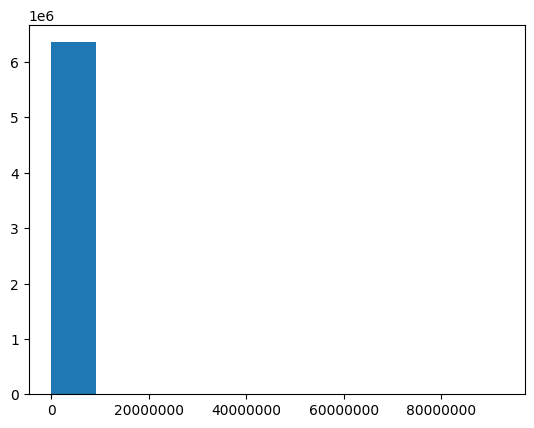

In [30]:
plt.ticklabel_format(style='plain', axis='x')
plt.hist(df['amount'],bins=10)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


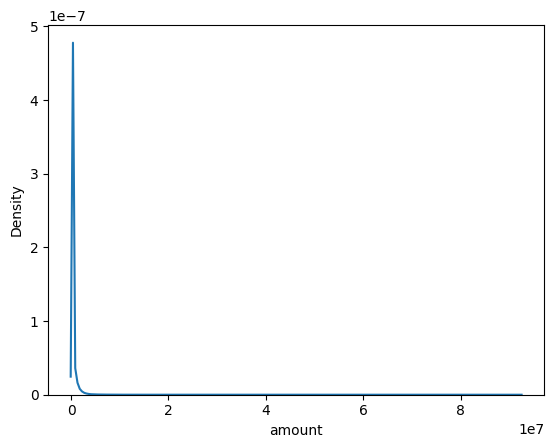

In [31]:
fig = sns.kdeplot(df['amount'])  #seems like highly right skewed distribution 

In [32]:
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x7e031c0f31f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e031c0f3730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e031c0f2f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7e031c0f3c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e031c0f3f10>],
 'means': []}

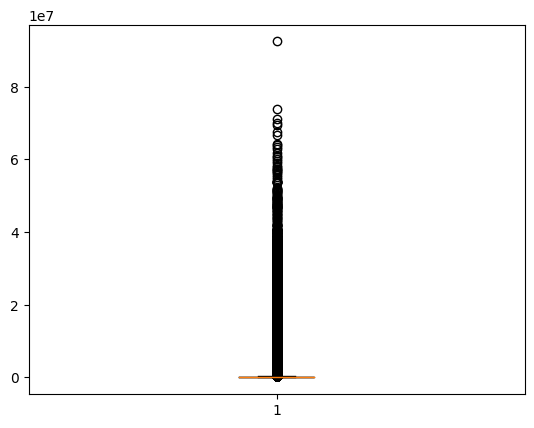

In [33]:
plt.boxplot(df['amount']) #large no of outliers

In [34]:
df['amount'].skew()         #skewed distribution

30.99394948249038

**observations** : 1.seems like pareto distribution 
2.large no of outliers
3.skewed distribution

In [19]:
df['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


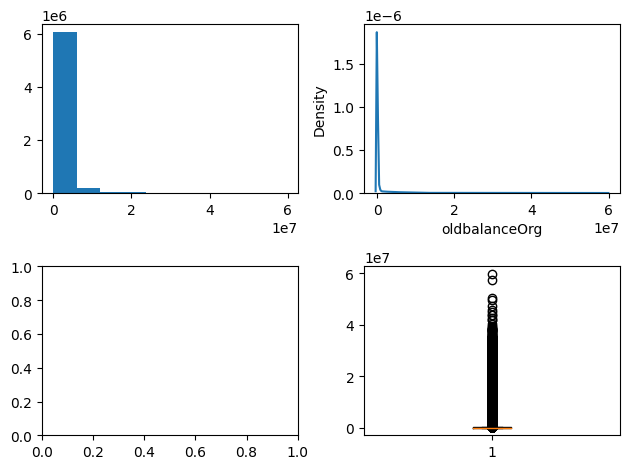

In [36]:
#oldbalanceOrg
fig,axs = plt.subplots(2,2)
axs[0,0].hist(df['oldbalanceOrg'])
sns.kdeplot(df['oldbalanceOrg'],ax=axs[0,1])
axs[1,1].boxplot(df['oldbalanceOrg'])
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


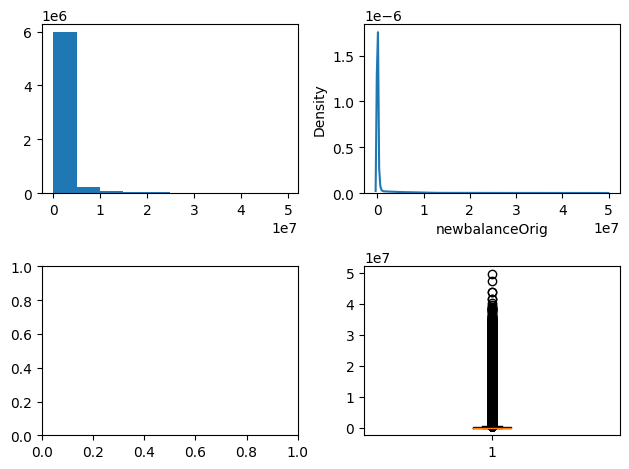

In [37]:
#newbalanceOrig
fig,axs = plt.subplots(2,2)
axs[0,0].hist(df['newbalanceOrig'])
sns.kdeplot(df['newbalanceOrig'],ax=axs[0,1])
axs[1,1] = plt.boxplot(df['newbalanceOrig'])
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


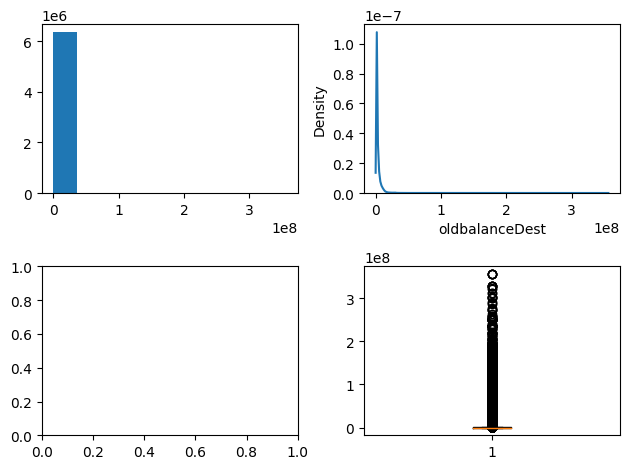

In [38]:
#oldbalanceDest
fig,axs = plt.subplots(2,2)
axs[0,0].hist(df['oldbalanceDest'])
sns.kdeplot(df['oldbalanceDest'],ax=axs[0,1])
axs[1,1].boxplot(df['oldbalanceDest'])
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


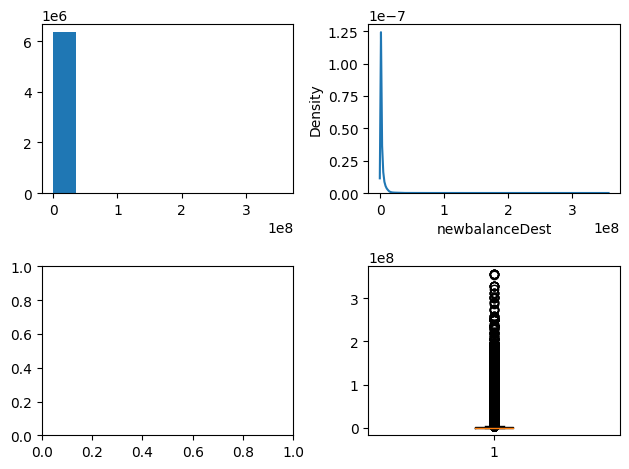

In [40]:
#newbalanceDest
fig,axs = plt.subplots(2,2)
axs[0,0].hist(df['newbalanceDest'])
sns.kdeplot(df['newbalanceDest'],ax=axs[0,1])
#axs[0,1].xlim(-20000000,20000000)
axs[1,1].boxplot(df['newbalanceDest'])

plt.tight_layout()

In [41]:
#Bivariate Analysis
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0,0,160296.360000,9839.640000
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0,0,19384.720000,1864.280000
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0,0.000000,181.000000
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0,0.000000,21363.000000
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0,0,29885.860000,11668.140000


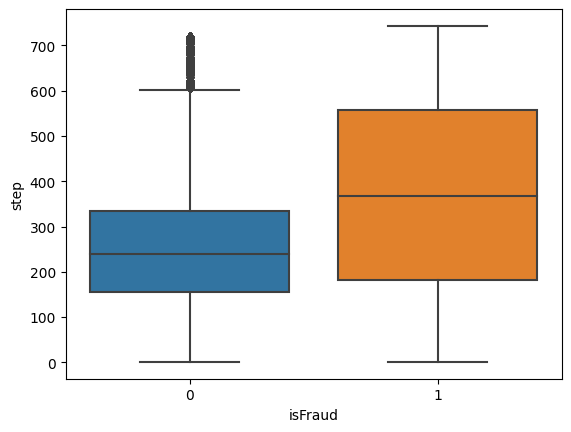

In [42]:
fig = sns.boxplot(x=df['isFraud'],y=df['step'])

In [43]:
pd.crosstab(df['step'],df['isFraud'])

isFraud,0,1
step,,
1,2692,16
2,1006,8
3,548,4
4,555,10
5,659,6
...,...,...
739,0,10
740,0,6
741,0,22


In [44]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0,0,160296.360000,9839.640000
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0,0,19384.720000,1864.280000
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0,0.000000,181.000000
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0,0.000000,21363.000000
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0,0,29885.860000,11668.140000


In [45]:
df['name_start']=df['nameOrig'].str[:1]

In [46]:
df['name_start'].nunique() #no use because here all values are related to 'C%'

1

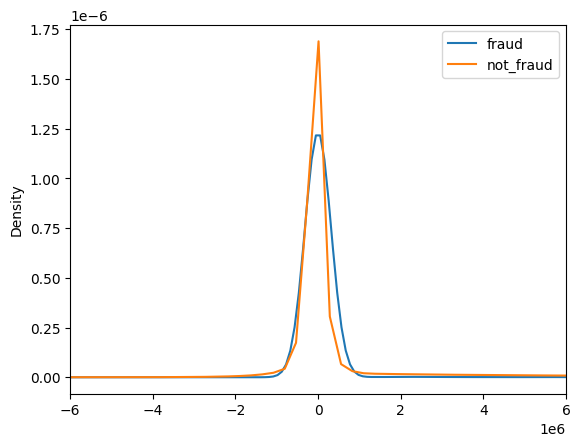

In [47]:
df[df['isFraud']==1]['newBalanceOriginUpdated'].plot(kind='kde',label='fraud')
df[df['isFraud']==0]['newBalanceOriginUpdated'].plot(kind='kde',label='not_fraud')

plt.xlim(-6000000,6000000)
plt.legend()
plt.show()

In [ ]:
df[df['isFraud']==1]['oldbalanceOrg'].plot(kind='kde')
df[df['isFraud']==0]['oldbalanceOrg'].plot(kind='kde')
plt.xlim(-40000000,40000000)
#yellow-->not fraud

distribution of fraud is more spread with respect to oldbalanceOrg . For values >0 fraud cases are more.

In [ ]:
#assumed that amount , oldbalanceOrg,oldbalanceDest are accurate and (newbalanceOrg and newbalanceDest) are not.so i created two new columns related to them.

In [48]:
df[(df['isFraud']==1)&(df['oldbalanceOrg']<=0)]  #accounts with old balance 0 also have been tried to rob. 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
724,1,CASH_OUT,416001.330000,C749981943,0.000000,0.000000,C667346055,102.000000,9291619.620000,1,0,-416001.330000,416103.330000,C
14861,8,CASH_OUT,181728.110000,C2102265902,0.000000,0.000000,C789014007,11397.000000,184477.770000,1,0,-181728.110000,193125.110000,C
25875,8,TRANSFER,1078013.760000,C1026280121,0.000000,0.000000,C277510102,0.000000,970749.680000,1,0,-1078013.760000,1078013.760000,C
77745,10,CASH_OUT,277970.880000,C489647033,0.000000,0.000000,C571514738,0.000000,277970.880000,1,0,-277970.880000,277970.880000,C
138559,11,TRANSFER,1933920.800000,C1706582969,0.000000,0.000000,C461905695,1283762.850000,3217683.650000,1,0,-1933920.800000,3217683.650000,C
169998,12,CASH_OUT,149668.660000,C227115333,0.000000,0.000000,C460735540,44170.110000,193838.760000,1,0,-149668.660000,193838.770000,C
178668,12,CASH_OUT,222048.710000,C265790428,0.000000,0.000000,C1700442291,2979.000000,225027.710000,1,0,-222048.710000,225027.710000,C
200845,13,CASH_OUT,454859.390000,C1274887619,0.000000,0.000000,C2146670328,0.000000,454859.390000,1,0,-454859.390000,454859.390000,C
291459,15,CASH_OUT,95428.320000,C947728507,0.000000,0.000000,C1720721903,0.000000,95428.320000,1,0,-95428.320000,95428.320000,C
296686,15,CASH_OUT,39713.280000,C1404885898,0.000000,0.000000,C1795377601,1274866.510000,1314579.790000,1,0,-39713.280000,1314579.790000,C


In [49]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0,0.000000,181.000000,C
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0,0.000000,21363.000000,C
251,1,TRANSFER,2806.000000,C1420196421,2806.000000,0.000000,C972765878,0.000000,0.000000,1,0,0.000000,2806.000000,C
252,1,CASH_OUT,2806.000000,C2101527076,2806.000000,0.000000,C1007251739,26202.000000,0.000000,1,0,0.000000,29008.000000,C
680,1,TRANSFER,20128.000000,C137533655,20128.000000,0.000000,C1848415041,0.000000,0.000000,1,0,0.000000,20128.000000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.130000,C786484425,339682.130000,0.000000,C776919290,0.000000,339682.130000,1,0,0.000000,339682.130000,C
6362616,743,TRANSFER,6311409.280000,C1529008245,6311409.280000,0.000000,C1881841831,0.000000,0.000000,1,0,0.000000,6311409.280000,C
6362617,743,CASH_OUT,6311409.280000,C1162922333,6311409.280000,0.000000,C1365125890,68488.840000,6379898.110000,1,0,0.000000,6379898.120000,C
6362618,743,TRANSFER,850002.520000,C1685995037,850002.520000,0.000000,C2080388513,0.000000,0.000000,1,0,0.000000,850002.520000,C


In [50]:
df[(df['newBalanceOriginUpdated']>0) & (df['isFraud']==1)].shape[0]

150

In [51]:
df[(df['newBalanceOriginUpdated']>0) & (df['isFraud']==0)].shape[0]

2275356

In [52]:
df[(df['newBalanceOriginUpdated']<=0) & (df['isFraud']==1)].shape[0]
#in mostly frauds either the total amount is debited or more than total

8063

In [53]:
df[(df['newBalanceOriginUpdated']<=0) & (df['isFraud']==0)].shape[0]
#mean most of them are due to errors and some due to fraud.

4079051

<Axes: >

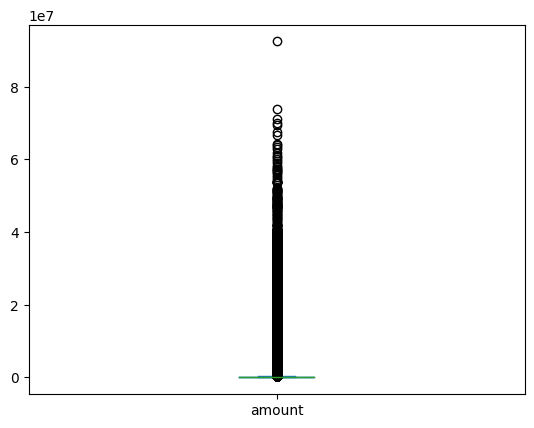

In [54]:
df['amount'].plot(kind='box') #so many outliers

In [55]:
df[df['amount']>80000000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
3686583,276,TRANSFER,92445516.640000,C1715283297,0.000000,0.000000,C439737079,9595.980000,92455112.620000,0,0,-92445516.640000,92455112.620000,C


In [56]:
df[(df['nameDest'].str[:1]=='M') & (df['isFraud']==1)] #merchants dest is never in fraud case.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start


In [57]:
df[df['oldbalanceDest']==0.0]  #some C also have 0.0 Balance at dest just like M

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0,0,160296.360000,9839.640000,C
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0,0,19384.720000,1864.280000,C
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0,0.000000,181.000000,C
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0,0,29885.860000,11668.140000,C
5,1,PAYMENT,7817.710000,C90045638,53860.000000,46042.290000,M573487274,0.000000,0.000000,0,0,46042.290000,7817.710000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362612,743,TRANSFER,1258818.820000,C1531301470,1258818.820000,0.000000,C1470998563,0.000000,0.000000,1,0,0.000000,1258818.820000,C
6362614,743,TRANSFER,339682.130000,C2013999242,339682.130000,0.000000,C1850423904,0.000000,0.000000,1,0,0.000000,339682.130000,C
6362615,743,CASH_OUT,339682.130000,C786484425,339682.130000,0.000000,C776919290,0.000000,339682.130000,1,0,0.000000,339682.130000,C
6362616,743,TRANSFER,6311409.280000,C1529008245,6311409.280000,0.000000,C1881841831,0.000000,0.000000,1,0,0.000000,6311409.280000,C


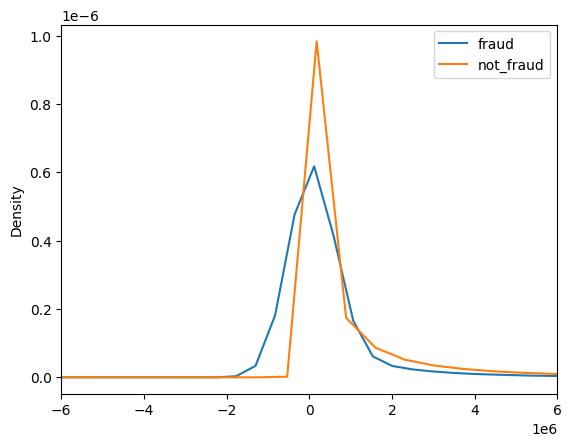

In [58]:
df[df['isFraud']==1]['oldbalanceDest'].plot(kind='kde',label = 'fraud')
df[df['isFraud']==0]['oldbalanceDest'].plot(kind='kde',label = 'not_fraud')
plt.legend()
plt.xlim(-6000000,6000000)
plt.show()

In [ ]:
df[df['oldbalanceDest']<0]

In [ ]:
df[df['isFraud']==1]['newBalanceDestUpdated'].plot(kind='kde',label = 'fraud')
df[df['isFraud']==0]['newBalanceDestUpdated'].plot(kind='kde',label = 'not_fraud')
plt.legend()
plt.xlim(-6000000,6000000)
plt.show()

In [122]:
df[['amount','oldbalanceOrg','oldbalanceDest','newBalanceOriginUpdated','newBalanceDestUpdated','isFraud']].corr()

,amount,oldbalanceOrg,oldbalanceDest,newBalanceOriginUpdated,newBalanceDestUpdated,isFraud
amount,1.000000,-0.002762,0.294137,-0.207239,0.442632,0.076688
oldbalanceOrg,-0.002762,1.000000,0.066243,0.978859,0.061689,0.010154
oldbalanceDest,0.294137,0.066243,1.000000,0.004643,0.987231,-0.005885
newBalanceOriginUpdated,-0.207239,0.978859,0.004643,1.000000,-0.030185,-0.005752
newBalanceDestUpdated,0.442632,0.061689,0.987231,-0.030185,1.000000,0.007260
isFraud,0.076688,0.010154,-0.005885,-0.005752,0.007260,1.000000


In [60]:
#Feature Engineering

# newBalanceDestUpdated and oldbalanceDest have high correlation
# oldbalanceOrg and newBalanceOriginUpdated have high correlation.
#so we drop oldbalanceDest as it is also 0(missing) for a lot of observations.
# and oldbalanceOrg also.

In [61]:
df[df['nameDest'].duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
78,1,TRANSFER,42712.390000,C283039401,10363.390000,0.000000,C1330106945,57901.660000,24044.180000,0,0,-32349.000000,100614.050000,C
82,1,TRANSFER,224606.640000,C873175411,0.000000,0.000000,C766572210,354678.920000,0.000000,0,0,-224606.640000,579285.560000,C
86,1,TRANSFER,554026.990000,C1603696865,0.000000,0.000000,C766572210,579285.560000,0.000000,0,0,-554026.990000,1133312.550000,C
88,1,TRANSFER,761507.390000,C412788346,0.000000,0.000000,C1590550415,1280036.230000,19169204.930000,0,0,-761507.390000,2041543.620000,C
89,1,TRANSFER,1429051.470000,C1520267010,0.000000,0.000000,C1590550415,2041543.620000,19169204.930000,0,0,-1429051.470000,3470595.090000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.990000,C994950684,63416.990000,0.000000,C1662241365,276433.180000,339850.170000,1,0,0.000000,339850.170000,C
6362613,743,CASH_OUT,1258818.820000,C1436118706,1258818.820000,0.000000,C1240760502,503464.500000,1762283.330000,1,0,0.000000,1762283.320000,C
6362615,743,CASH_OUT,339682.130000,C786484425,339682.130000,0.000000,C776919290,0.000000,339682.130000,1,0,0.000000,339682.130000,C
6362617,743,CASH_OUT,6311409.280000,C1162922333,6311409.280000,0.000000,C1365125890,68488.840000,6379898.110000,1,0,0.000000,6379898.120000,C


In [62]:
df[df['nameDest']=='C1662241365']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
5601016,394,CASH_IN,162112.040000,C81322698,9951.000000,172063.040000,C1662241365,0.000000,0.000000,0,0,-152161.040000,162112.040000,C
6029929,471,CASH_OUT,177421.530000,C1866590143,1610.000000,0.000000,C1662241365,0.000000,177421.530000,0,0,-175811.530000,177421.530000,C
6344749,692,TRANSFER,99011.660000,C1790501294,0.000000,0.000000,C1662241365,177421.530000,276433.180000,0,0,-99011.660000,276433.190000,C
6362611,742,CASH_OUT,63416.990000,C994950684,63416.990000,0.000000,C1662241365,276433.180000,339850.170000,1,0,0.000000,339850.170000,C


In [63]:
df[df['type']=='CASH_IN']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
389,1,CASH_IN,143236.260000,C1862994526,0.000000,143236.260000,C1688019098,608932.170000,97263.780000,0,0,-143236.260000,752168.430000,C
390,1,CASH_IN,228451.890000,C1614133563,143236.260000,371688.150000,C2083562754,719678.380000,1186556.810000,0,0,-85215.630000,948130.270000,C
391,1,CASH_IN,35902.490000,C839771540,371688.150000,407590.650000,C2001112025,49003.300000,0.000000,0,0,335785.660000,84905.790000,C
392,1,CASH_IN,232953.640000,C1037163664,407590.650000,640544.280000,C33524623,1172672.270000,1517262.160000,0,0,174637.010000,1405625.910000,C
393,1,CASH_IN,65912.950000,C180316302,640544.280000,706457.230000,C1330106945,104198.260000,24044.180000,0,0,574631.330000,170111.210000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362253,718,CASH_IN,188888.890000,C1459052107,51838.000000,240726.890000,C1955750585,0.000000,0.000000,0,0,-137050.890000,188888.890000,C
6362271,718,CASH_IN,27919.600000,C562982749,2413.000000,30332.600000,C240654881,512791.590000,484871.980000,0,0,-25506.600000,540711.190000,C
6362279,718,CASH_IN,78988.380000,C886862695,204464.000000,283452.380000,C262804200,108724.190000,29735.810000,0,0,125475.620000,187712.570000,C
6362298,718,CASH_IN,18000.260000,C50108853,63409.000000,81409.260000,C204102272,28088.610000,10088.340000,0,0,45408.740000,46088.870000,C


In [64]:
df[df['type']=='CASH_OUT']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0,0.000000,21363.000000,C
15,1,CASH_OUT,229133.940000,C905080434,15325.000000,0.000000,C476402209,5083.000000,51513.440000,0,0,-213808.940000,234216.940000,C
42,1,CASH_OUT,110414.710000,C768216420,26845.410000,0.000000,C1509514333,288800.000000,2415.160000,0,0,-83569.300000,399214.710000,C
47,1,CASH_OUT,56953.900000,C1570470538,1942.020000,0.000000,C824009085,70253.000000,64106.180000,0,0,-55011.880000,127206.900000,C
48,1,CASH_OUT,5346.890000,C512549200,0.000000,0.000000,C248609774,652637.000000,6453430.910000,0,0,-5346.890000,657983.890000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.990000,C994950684,63416.990000,0.000000,C1662241365,276433.180000,339850.170000,1,0,0.000000,339850.170000,C
6362613,743,CASH_OUT,1258818.820000,C1436118706,1258818.820000,0.000000,C1240760502,503464.500000,1762283.330000,1,0,0.000000,1762283.320000,C
6362615,743,CASH_OUT,339682.130000,C786484425,339682.130000,0.000000,C776919290,0.000000,339682.130000,1,0,0.000000,339682.130000,C
6362617,743,CASH_OUT,6311409.280000,C1162922333,6311409.280000,0.000000,C1365125890,68488.840000,6379898.110000,1,0,0.000000,6379898.120000,C


In [65]:
df[df['type']=='TRANSFER']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0,0.000000,181.000000,C
19,1,TRANSFER,215310.300000,C1670993182,705.000000,0.000000,C1100439041,22425.000000,0.000000,0,0,-214605.300000,237735.300000,C
24,1,TRANSFER,311685.890000,C1984094095,10835.000000,0.000000,C932583850,6267.000000,2719172.890000,0,0,-300850.890000,317952.890000,C
58,1,TRANSFER,62610.800000,C1976401987,79114.000000,16503.200000,C1937962514,517.000000,8383.290000,0,0,16503.200000,63127.800000,C
78,1,TRANSFER,42712.390000,C283039401,10363.390000,0.000000,C1330106945,57901.660000,24044.180000,0,0,-32349.000000,100614.050000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.990000,C778071008,63416.990000,0.000000,C1812552860,0.000000,0.000000,1,0,0.000000,63416.990000,C
6362612,743,TRANSFER,1258818.820000,C1531301470,1258818.820000,0.000000,C1470998563,0.000000,0.000000,1,0,0.000000,1258818.820000,C
6362614,743,TRANSFER,339682.130000,C2013999242,339682.130000,0.000000,C1850423904,0.000000,0.000000,1,0,0.000000,339682.130000,C
6362616,743,TRANSFER,6311409.280000,C1529008245,6311409.280000,0.000000,C1881841831,0.000000,0.000000,1,0,0.000000,6311409.280000,C


In [ ]:
df[df['amount']==181.00]

In [66]:
y = df[df['isFraud']==1]
y[y.duplicated(subset=['nameDest','isFraud'])] 
# no subset nameOrig','isFraud' is repeated that is fraudy. but 'nameDest' and 'isFraud' pair is repeated in Fraud cases.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
4858,5,CASH_OUT,120074.730000,C1174000532,120074.730000,0.000000,C410033330,0.000000,120074.730000,1,0,0.000000,120074.730000,C
301802,15,CASH_OUT,170.000000,C1065370362,170.000000,0.000000,C200064275,413421.360000,345764.150000,1,0,0.000000,413591.360000,C
397547,18,CASH_OUT,295664.180000,C1446413189,295664.180000,0.000000,C185805228,10184336.540000,10480000.720000,1,0,0.000000,10480000.720000,C
695415,36,CASH_OUT,1684039.120000,C168686866,1684039.120000,0.000000,C803116137,32961658.250000,34645697.370000,1,0,0.000000,34645697.370000,C
1006043,46,CASH_OUT,71372.000000,C313736303,71372.000000,0.000000,C935310781,613464.040000,684836.040000,1,0,0.000000,684836.040000,C
1030368,59,CASH_OUT,2050727.810000,C992917413,2050727.810000,0.000000,C104038589,0.000000,2050727.810000,1,0,0.000000,2050727.810000,C
1030590,74,CASH_OUT,455074.130000,C695129655,455074.130000,0.000000,C1013511446,9237170.740000,9692244.860000,1,0,0.000000,9692244.870000,C
1030668,83,CASH_OUT,594577.220000,C422847899,594577.220000,0.000000,C52390890,685106.850000,1279684.070000,1,0,0.000000,1279684.070000,C
1030736,88,CASH_OUT,4022408.760000,C987446721,4022408.760000,0.000000,C1981613973,4542879.500000,8565288.260000,1,0,0.000000,8565288.260000,C
1048324,95,CASH_OUT,87999.250000,C409531429,87999.250000,0.000000,C1827219533,0.000000,87999.250000,1,0,0.000000,87999.250000,C


In [67]:
df[df['nameDest']=='C410033330'] # we will keep nameDest and remove nameOrg

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,name_start
4693,4,TRANSFER,13707.110000,C17222024,13707.110000,0.000000,C410033330,0.000000,0.000000,1,0,0.000000,13707.110000,C
4858,5,CASH_OUT,120074.730000,C1174000532,120074.730000,0.000000,C410033330,0.000000,120074.730000,1,0,0.000000,120074.730000,C
6985,6,CASH_OUT,47097.560000,C1584779130,12068.670000,0.000000,C410033330,120074.730000,161722.170000,0,0,-35028.890000,167172.290000,C
7340,7,CASH_OUT,116112.900000,C841323501,0.000000,0.000000,C410033330,167172.290000,161722.170000,0,0,-116112.900000,283285.190000,C
7911,7,CASH_IN,105342.590000,C68389623,4801725.130000,4907067.720000,C410033330,283285.190000,161722.170000,0,0,4696382.540000,388627.780000,C
8403,7,CASH_IN,16220.420000,C1708101024,3906907.440000,3923127.860000,C410033330,177942.600000,161722.170000,0,0,3890687.020000,194163.020000,C
10356,7,CASH_OUT,74032.660000,C2115622555,51218.820000,0.000000,C410033330,161722.170000,78487.870000,0,0,-22813.840000,235754.830000,C
13416,7,CASH_IN,157266.960000,C1608556434,4069836.170000,4227103.140000,C410033330,235754.840000,78487.870000,0,0,3912569.210000,393021.800000,C
42484,9,CASH_OUT,190020.780000,C1624167774,60553.000000,0.000000,C410033330,78487.870000,268508.660000,0,0,-129467.780000,268508.650000,C
67612,9,CASH_OUT,139590.250000,C1951524307,0.000000,0.000000,C410033330,268508.660000,563433.260000,0,0,-139590.250000,408098.910000,C


In [68]:
cross_tab1 = pd.crosstab(df['step'],df['isFraud'],normalize='index')*100
cross_tab1

isFraud,0,1
step,,
1,99.409158,0.590842
2,99.211045,0.788955
3,99.275362,0.724638
4,98.230088,1.769912
5,99.097744,0.902256
...,...,...
739,0.000000,100.000000
740,0.000000,100.000000
741,0.000000,100.000000


In [70]:
pd.crosstab(df['type'],df['isFraud'],normalize='index')*100
#we can see that fraud cases are only in cash_out and transfer cases .
#so we will be taking only rows related to these two case for better accuracy. 

isFraud,0,1
type,,
CASH_IN,100.000000,0.000000
CASH_OUT,99.816045,0.183955
DEBIT,100.000000,0.000000
PAYMENT,100.000000,0.000000
TRANSFER,99.231201,0.768799


In [23]:
df_model = df[(df['type']=='CASH_OUT') | (df['type']=='TRANSFER')]

In [25]:
df_model.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0.00,21363.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,-213808.94,234216.94
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,-214605.30,237735.30
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,-300850.89,317952.89


In [72]:
df_model.shape

(2770409, 14)

In [27]:
df_model = df_model.drop(columns=['oldbalanceDest','oldbalanceOrg','nameOrig','newbalanceDest','newbalanceOrig','nameDest'])

In [29]:
df_model = df_model.reset_index(drop=True)

In [32]:
df_model.head()

,step,type,amount,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated
0,1,TRANSFER,181.00,1,0,0.00,181.00
1,1,CASH_OUT,181.00,1,0,0.00,21363.00
2,1,CASH_OUT,229133.94,0,0,-213808.94,234216.94
3,1,TRANSFER,215310.30,0,0,-214605.30,237735.30
4,1,TRANSFER,311685.89,0,0,-300850.89,317952.89


In [16]:
#df_model = df_model.drop(columns=['name_start']) #our training dataset

In [20]:
#df_model.to_csv('model1.csv')

In [80]:
df_model[df_model['isFlaggedFraud']==1]

,step,type,amount,nameDest,isFraud,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated
1204984,212,TRANSFER,4953893.080000,C639921569,1,1,0.000000,4953893.080000
1422214,250,TRANSFER,1343002.080000,C1147517658,1,1,0.000000,1343002.080000
1646619,279,TRANSFER,536624.410000,C1100697970,1,1,0.000000,536624.410000
2428454,387,TRANSFER,4892193.090000,C891140444,1,1,0.000000,4892193.090000
2619154,425,TRANSFER,10000000.000000,C1392803603,1,1,9585040.370000,10000000.000000
2619156,425,TRANSFER,9585040.370000,C1109166882,1,1,10000000.000000,9585040.370000
2688696,554,TRANSFER,3576297.100000,C484597480,1,1,0.000000,3576297.100000
2703826,586,TRANSFER,353874.220000,C1770418982,1,1,0.000000,353874.220000
2729568,617,TRANSFER,2542664.270000,C661958277,1,1,0.000000,2542664.270000
2736011,646,TRANSFER,10000000.000000,C1806199534,1,1,399045.080000,10000000.000000


In [36]:
df_model2 = df.drop(columns=['oldbalanceDest','oldbalanceOrg','nameOrig','newbalanceDest','newbalanceOrig','nameDest'])

In [ ]:
#------------------ML MODEL DEVELOPMENT----------------------------

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [50]:
df_model =  pd.get_dummies(df_model)

In [52]:
X=df_model.drop(columns=['isFraud'])
y=df_model['isFraud']

In [54]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
X_train.head()

,step,amount,isFlaggedFraud,newBalanceOriginUpdated,newBalanceDestUpdated,type_CASH_OUT,type_TRANSFER
582949,137,256796.36,0,-256796.36,1083765.79,True,False
1360628,235,76426.86,0,-55618.86,474575.93,True,False
1908588,309,173912.66,0,-173912.66,639659.30,True,False
235758,20,197978.48,0,6592.52,197978.48,True,False
1746201,298,352228.73,0,-350744.73,515247.80,True,False


In [58]:
print(X_train.shape)
print(X_test.shape)

(2216327, 7)
(554082, 7)


In [60]:
rf = RandomForestClassifier()

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred = rf.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test, y_pred)

0.9999837569168463

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix, classification_report

In [74]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [76]:
precision

1.0

In [78]:
recall

0.9945321992709599

In [80]:
f1

0.9972586049345111

In [82]:
cm = confusion_matrix(y_test,y_pred)

In [84]:
cm

array([[552436,      0],
       [     9,   1637]], dtype=int64)

In [118]:
#cm[0][0]/(cm[0][0] + cm[1][0])

0.9999837087854899

In [120]:
#cm[1][1]/(cm[1][1] + cm[1][0])

0.9945321992709599

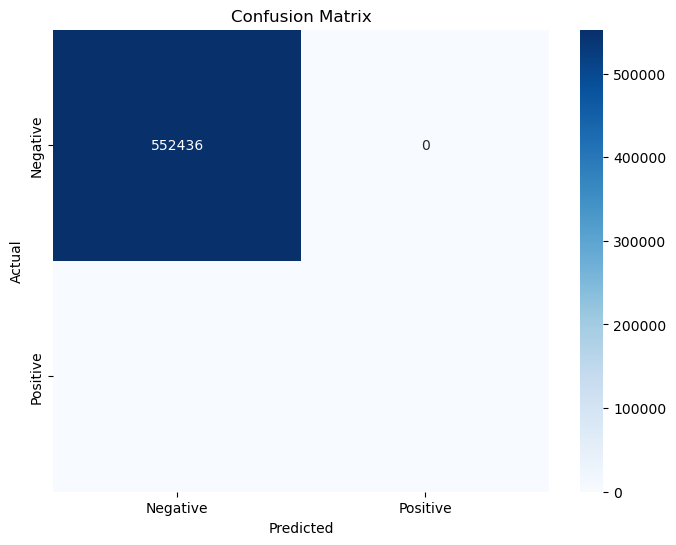

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [96]:
y_test.value_counts()   # we can see there are values in pos-pos cell also . but due to some reasons heatmap is not showing it.

isFraud
0    552436
1      1646
Name: count, dtype: int64

In [114]:
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

In [116]:
print(report)

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00    552436
    Positive       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

